`05_eda.ipynb`

# EDA - Exploratory Data Analysis (탐색적 데이터 분석)
분석 초기 단계에서 데이터를 다양한 관점에서 관찰, 이해하는 과정

## 주요 내용
1. 데이터 이해
2. 데이터 품질 검사
3. 데이터 시각화
4. 변수간 관계 분석
5. 가설 검정

## EDA 전략 프레임워크
### 문제 정의와 목적 설정
- 목적) 우리가 해결하려는 비즈니스 문제는 무엇인가
- 의사결정) 이 분석을 통해 누가, 무엇을 결정하는가
- 성공기준) 분석의 P/F 기준은 무엇인가

### 데이터 이해 단계적 접근
- 데이터 개요 파악
- 변수 분류와 우선순위 설정
- 가설 기반 탐색 전략 
    - 관찰 - X 변수의 분포는 어떤 특성이 있을 것
    - 관계 - X - Y사이의 특정 관계가 있을 것
    - 그룹 - A - B은 특정 변수에서 차이가 있을 것


In [ ]:
a = [-3,-2,-1,], b=[], c= []
data = {'col1':a, 'col2': b, 'col3': c}

df.skew()

In [4]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

boston = pd.read_csv('./boston-housing.csv', header=None, sep=r'\s+')
boston.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
display(boston.head())

# 1단계: Boston Housing 데이터 탐색
print("=== Boston Housing 데이터셋 개요 ===")
print(f"데이터 크기: {boston.shape}")
print(f"변수 설명:")

# 변수 설명 딕셔너리
feature_descriptions = {
    'CRIM': '지역별 1인당 범죄율',
    'ZN': '25,000 sq.ft. 이상 주거지역 비율',
    'INDUS': '비소매업 지역 비율', 
    'CHAS': '찰스강 인접 여부 (1: 인접, 0: 비인접)',
    'NOX': '일산화질소 농도 (ppm)',
    'RM': '주택당 평균 방 개수',
    'AGE': '1940년 이전 건축 주택 비율',
    'DIS': '보스턴 고용센터까지 가중거리',
    'RAD': '방사형 고속도로 접근성 지수',
    'TAX': '재산세율',
    'PTRATIO': '학생-교사 비율',
    'B': '흑인 거주 비율 관련 지수',
    'LSTAT': '하위계층 비율',
    'PRICE': '주택 중간값 (단위: $1000)'
}

for var, desc in feature_descriptions.items():
    print(f"  {var}: {desc}")

print(f"\n기본 정보:")
print(boston.info())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


=== Boston Housing 데이터셋 개요 ===
데이터 크기: (506, 14)
변수 설명:
  CRIM: 지역별 1인당 범죄율
  ZN: 25,000 sq.ft. 이상 주거지역 비율
  INDUS: 비소매업 지역 비율
  CHAS: 찰스강 인접 여부 (1: 인접, 0: 비인접)
  NOX: 일산화질소 농도 (ppm)
  RM: 주택당 평균 방 개수
  AGE: 1940년 이전 건축 주택 비율
  DIS: 보스턴 고용센터까지 가중거리
  RAD: 방사형 고속도로 접근성 지수
  TAX: 재산세율
  PTRATIO: 학생-교사 비율
  B: 흑인 거주 비율 관련 지수
  LSTAT: 하위계층 비율
  PRICE: 주택 중간값 (단위: $1000)

기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-nu

In [23]:
def get_data_profile(df :pd.DataFrame, target_col = None):
    """종합적인 데이터 프로파일링 함수"""
    print('='* 50)
    print('종합 데이터 품질 리포트')
    print('=' * 50)

    #1. 기본 통계
    print(f'\n1.기본정보')
    print(f'- 데이터 크기: {df.shape[0]}행 x {df.shape[1]}열')
    print(f'- 메모리 사용량:{df.memory_usage(deep=True).sum()/1024**2:.2f}')
    print(f'- 수치형 변수: {df.select_dtypes(include=['number']).columns}개')
    print(f'- 범주형 변수: {len(df.select_dtypes(include=['object']).columns)}개')

    #2. 결측값 분석
    print(f'\n2. 결측값 분석')
    missing_info = df.isnull().sum()
    m_pct = (missing_info/len(df))* 100
    if missing_info.sum() == 0:
        print('결측값 없음. 완전')
    else:
        missing_sum = pd.DataFrame({
            '결측수': missing_info,
            '결측율(%)': m_pct,
        }).round(2)
        missing_sum = pd.DataFrame({
            '결측수':missing_info,
            '결측율(%)':m_pct,
        }).round(2)
        missing_sum = missing_sum[missing_sum['결측수'] > 0]
        display(missing_sum)

    # 3. 데이터 타입별 분석
    print(f'\n수치형 변수 품질 분석')
    num_cols = df.select_dtypes(include = ['number']).columns
    print(num_cols)

    quality_report = []
    for col in num_cols:
        col_data = df[col].dropna()
        # 기본 통계
        stats = {
            '변수명' : col,
            '평균' : col_data.mean(),
            '표준편차': col_data.std(),
            '최솟값': col_data.min(),
            '최댓값': col_data.max(),
            '왜도': col_data.skew(),
            '첨도' : col_data.kurtosis()
        }

        # 이상값 비율
        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1
        mask = (col_data < Q1 - 1.5 * IQR) | (col_data > Q3 +1.5 * IQR)
        outliers = col_data[mask]
        stats['이상값비율(%)'] = (len(outliers)/len(col_data)) * 100
        
        # 유일값 비율
        stats['유일값 비율(%)'] = (col_data.nunique()/len(col_data)) * 100

        quality_report.append(stats)

    quality_df = pd.DataFrame(quality_report).round(3)
    display(quality_df)

    # 4. 분포 이상 감지
    print(f'\n분포 이상 감지')
    print(f'- 극심한 왜도(|Skewness|>2)')
    high_skews = quality_df[abs(quality_df['왜도'])>2]['변수명'].to_list()
    if high_skews:
        for var in high_skews:
            skew_val = quality_df[quality_df['변수명'] == var].iloc[0]['왜도']
            print(f'--{var}: 왜도 = {skew_val:.3f}')
    else:
        print('-- 정상 범위 내 분포')

    print('- 높은 이상값 비율(>5%)')
    high_outliers = quality_df[quality_df['이상값비율(%)'] > 5]['변수명'].tolist()
    if high_outliers:
        for var in high_outliers:
            outlier_pct = quality_df[quality_df['변수명'] == var].iloc[0]['이상값비율(%)']
            print(f'--{var}:이상값{outlier_pct:.1f}')
    else:
        print('-- 이상값 비율 양호')

    return quality_df


get_data_profile(boston)

종합 데이터 품질 리포트

1.기본정보
- 데이터 크기: 506행 x 14열
- 메모리 사용량:0.05
- 수치형 변수: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')개
- 범주형 변수: 0개

2. 결측값 분석
결측값 없음. 완전

수치형 변수 품질 분석
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값 비율(%)
0,CRIM,3.614,8.602,0.006,88.976,5.223,37.131,13.043,99.605
1,ZN,11.364,23.322,0.000,100.000,2.226,4.032,13.439,5.138
2,INDUS,11.137,6.860,0.460,27.740,0.295,-1.234,0.000,15.020
3,CHAS,0.069,0.254,0.000,1.000,3.406,9.638,6.917,0.395
4,NOX,0.555,0.116,0.385,0.871,0.729,-0.065,0.000,16.008
5,RM,6.285,0.703,3.561,8.780,0.404,1.892,5.929,88.142
6,AGE,68.575,28.149,2.900,100.000,-0.599,-0.968,0.000,70.356
7,DIS,3.795,2.106,1.130,12.126,1.012,0.488,0.988,81.423
8,RAD,9.549,8.707,1.000,24.000,1.005,-0.867,0.000,1.779
9,TAX,408.237,168.537,187.000,711.000,0.670,-1.142,0.000,13.043



분포 이상 감지
- 극심한 왜도(|Skewness|>2)
--CRIM: 왜도 = 5.223
--ZN: 왜도 = 2.226
--CHAS: 왜도 = 3.406
--B: 왜도 = -2.890
- 높은 이상값 비율(>5%)
--CRIM:이상값13.0
--ZN:이상값13.4
--CHAS:이상값6.9
--RM:이상값5.9
--B:이상값15.2
--PRICE:이상값7.9


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값 비율(%)
0,CRIM,3.614,8.602,0.006,88.976,5.223,37.131,13.043,99.605
1,ZN,11.364,23.322,0.000,100.000,2.226,4.032,13.439,5.138
2,INDUS,11.137,6.860,0.460,27.740,0.295,-1.234,0.000,15.020
3,CHAS,0.069,0.254,0.000,1.000,3.406,9.638,6.917,0.395
4,NOX,0.555,0.116,0.385,0.871,0.729,-0.065,0.000,16.008
5,RM,6.285,0.703,3.561,8.780,0.404,1.892,5.929,88.142
6,AGE,68.575,28.149,2.900,100.000,-0.599,-0.968,0.000,70.356
7,DIS,3.795,2.106,1.130,12.126,1.012,0.488,0.988,81.423
8,RAD,9.549,8.707,1.000,24.000,1.005,-0.867,0.000,1.779
9,TAX,408.237,168.537,187.000,711.000,0.670,-1.142,0.000,13.043


In [ ]:
# 5단계: 변수간 논리적 일관성 검증
# 관계 1: 범죄율과 주택가격 (일반적으로 )
crime_price_corr = boston['CRIM'].corr(boston['PRICE'])
print(f'범죄율-주태가격 상관계수: {crime_price_corr:.3f}')
if 
# 주택 가격 상위 20% 면서 범죄율 상위 20%의 존재여부를 확인한다.
rooms_price_corr = boston['RM'].corr(boston['ORice'])

In [ ]:
# 높은 가격 & 높은 지역
quality_socres = 

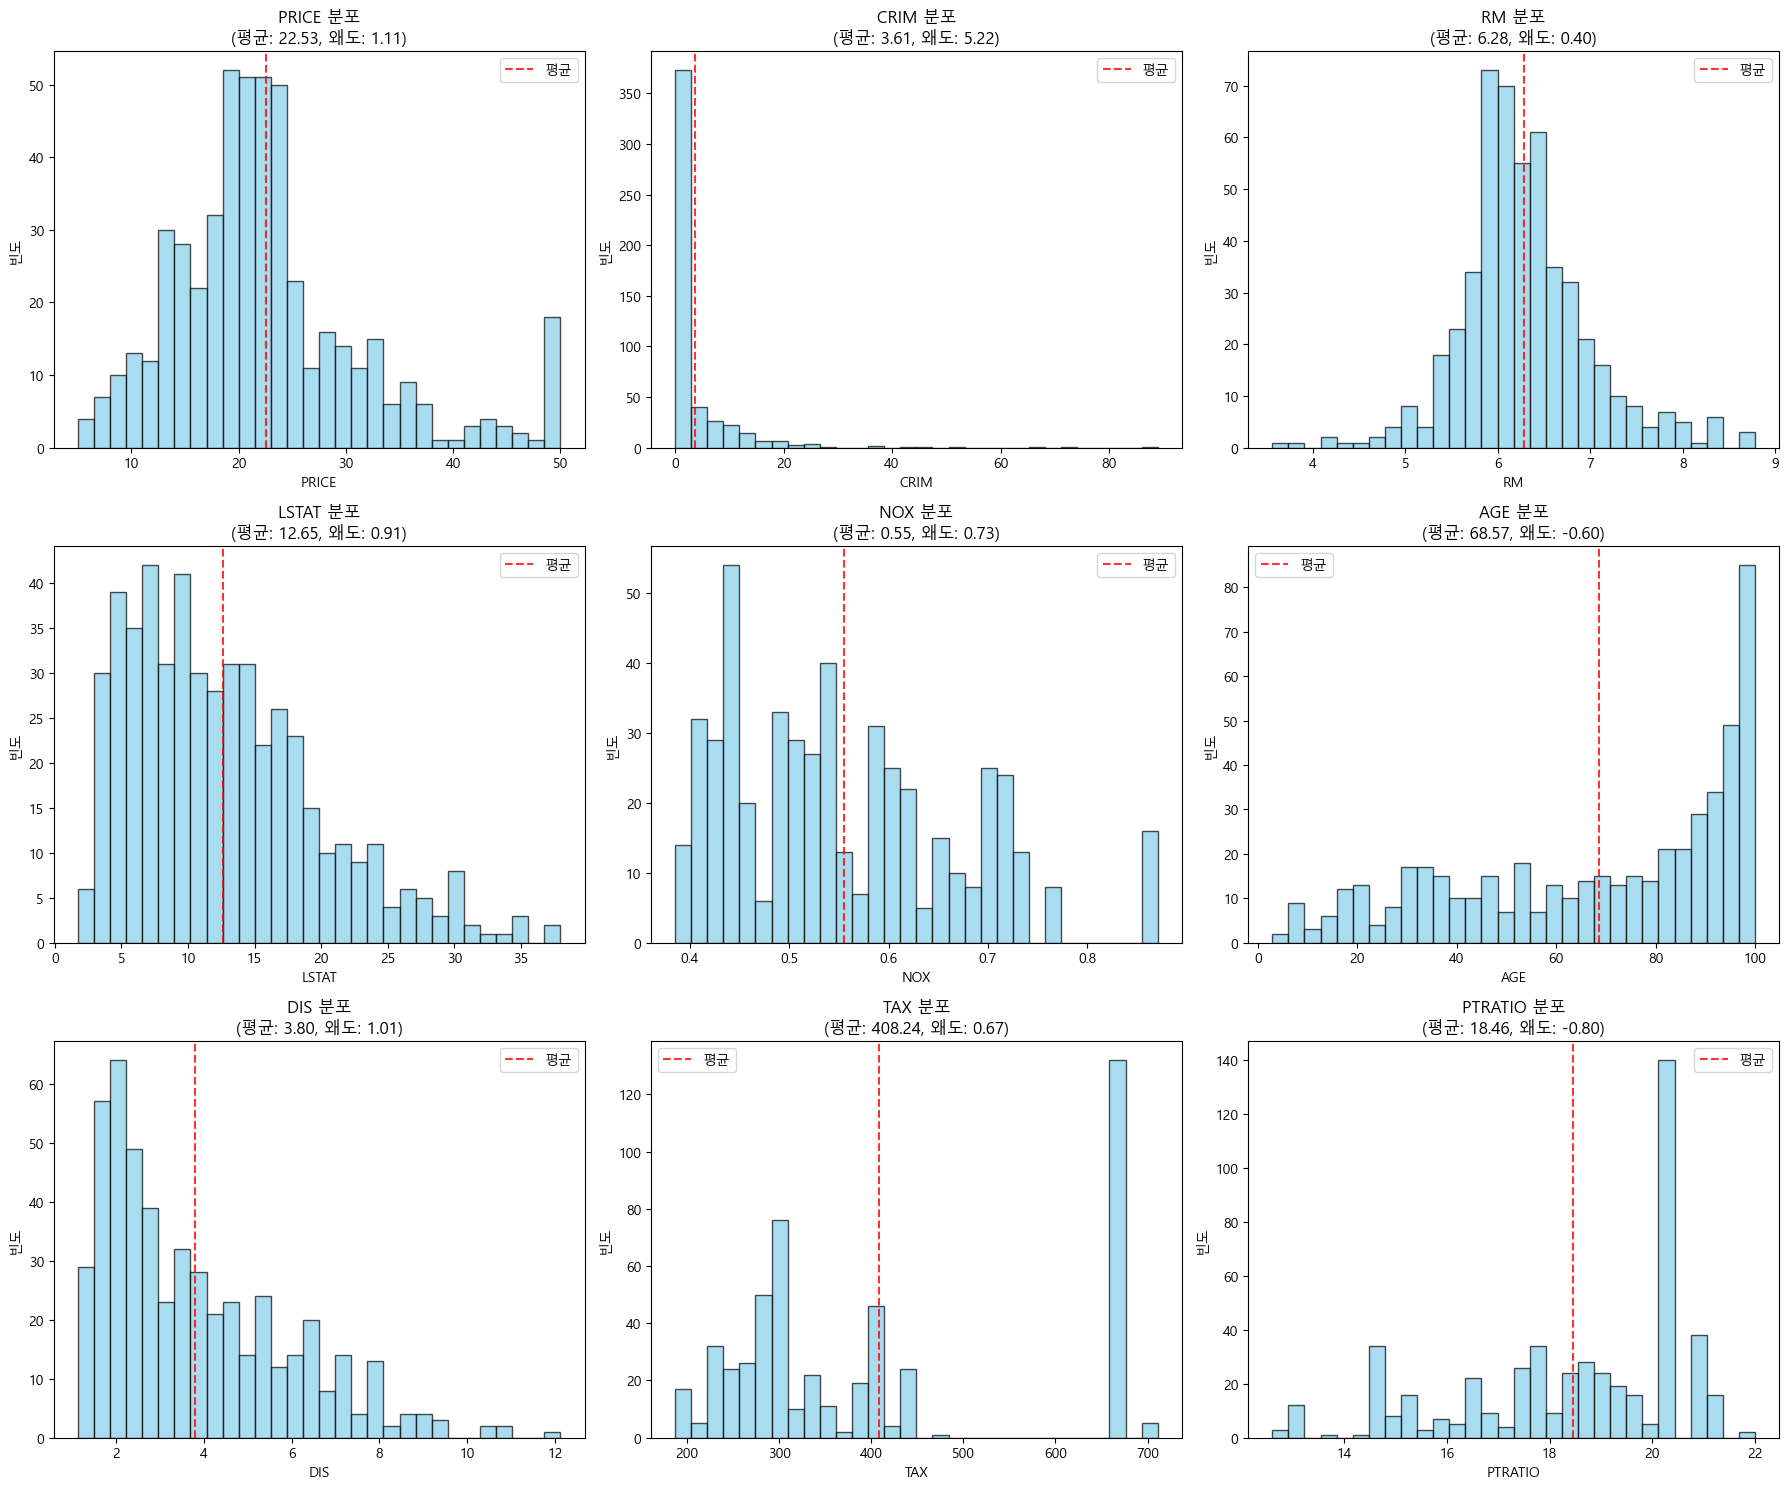

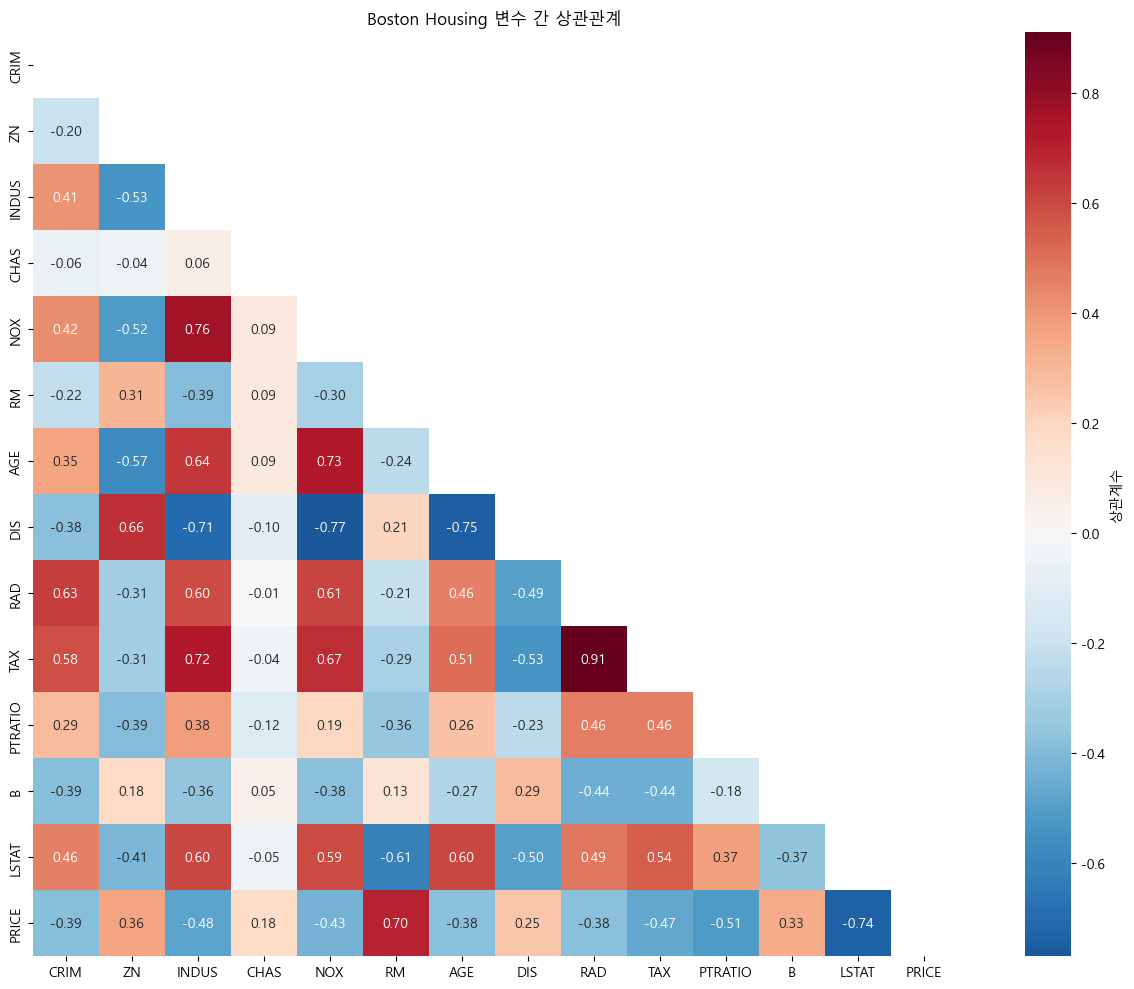

=== 상관관계 분석 결과 ===
PRICE와 상관관계가 높은(>0.5) 변수들:
  LSTAT: 0.738 (음의 상관관계)
  RM: 0.695 (양의 상관관계)
  PTRATIO: 0.508 (음의 상관관계)


In [24]:
# 3단계: 시각적 품질 진단
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

# 주요 변수들의 분포 시각화
key_vars = ['PRICE', 'CRIM', 'RM', 'LSTAT', 'NOX', 'AGE', 'DIS', 'TAX', 'PTRATIO']

for i, var in enumerate(key_vars):
    if i < len(axes):
        # 히스토그램과 박스플롯 조합
        ax = axes[i]
        
        # 히스토그램
        ax.hist(boston[var], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        ax.set_title(f'{var} 분포\n(평균: {boston[var].mean():.2f}, 왜도: {boston[var].skew():.2f})')
        ax.set_xlabel(var)
        ax.set_ylabel('빈도')
        
        # 평균선 표시
        ax.axvline(boston[var].mean(), color='red', linestyle='--', alpha=0.8, label='평균')
        ax.legend()

plt.tight_layout()
plt.show()

# 상관관계 히트맵으로 품질 검증
plt.figure(figsize=(14, 10))
correlation_matrix = boston.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            center=0, cmap='RdBu_r', square=True, cbar_kws={'label': '상관계수'})
plt.title('Boston Housing 변수 간 상관관계')
plt.tight_layout()
plt.show()

print("=== 상관관계 분석 결과 ===")
price_corr = correlation_matrix['PRICE'].abs().sort_values(ascending=False)
print("PRICE와 상관관계가 높은(>0.5) 변수들:")
for var, corr in price_corr.items():
    if var != 'PRICE' and corr > 0.5:
        print(f"  {var}: {corr:.3f} ({'양의 상관관계' if correlation_matrix['PRICE'][var] > 0 else '음의 상관관계'})")

In [14]:
# 실습 관련해서 eda적인 생각을 기반으로 해서
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


# 온라인 소매 데이터 생성 (컬럼명 소문자 버전)
np.random.seed(42)
n_customers = 1000

def create_realistic_ecommerce_data(n=1000):
    """실제와 유사한 전자상거래 데이터 생성 (소문자 컬럼명)"""
    
    data = {}
    
    # 고객 기본 정보
    data['customer_id'] = range(1, n+1)
    data['age'] = np.random.normal(35, 12, n).clip(18, 80).astype(int)
    data['gender'] = np.random.choice(['M', 'F'], n, p=[0.45, 0.55])
    data['city'] = np.random.choice(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju'], 
                                   n, p=[0.4, 0.2, 0.15, 0.15, 0.1])
    
    # 구매 행동 데이터
    data['total_purchases'] = np.random.poisson(8, n) + 1
    data['avg_order_value'] = np.random.lognormal(4.5, 0.8, n).round(2)
    data['days_since_last_purchase'] = np.random.exponential(30, n).astype(int)
    
    # 만족도 및 충성도
    data['satisfaction_score'] = np.random.normal(3.8, 1.2, n).clip(1, 5).round(1)
    data['loyalty_points'] = (data['total_purchases'] * data['avg_order_value'] * 0.1 + 
                             np.random.normal(0, 100, n)).clip(0, None).round(0)
    
    # 카테고리별 구매 금액
    categories = ['electronics', 'clothing', 'books', 'home', 'sports']
    for cat in categories:
        # 일부 고객은 특정 카테고리에서 구매하지 않음
        values = np.random.lognormal(3, 1, n)
        # 30% 확률로 해당 카테고리 구매 안 함 (0으로 설정)
        mask = np.random.random(n) < 0.3
        values[mask] = 0
        data[f'{cat}_spending'] = values.round(2)
    
    df = pd.DataFrame(data)
    
    # 의도적 결측값 생성 (실제 상황 모방)
    
    # 1. MCAR: 완전 무작위 결측 (시스템 오류)
    missing_indices = np.random.choice(df.index, size=int(0.05 * len(df)), replace=False)
    df.loc[missing_indices, 'satisfaction_score'] = np.nan
    
    # 2. MAR: 조건부 결측 (나이가 높을수록 만족도 응답 거부율 증가)
    elderly_mask = df['age'] > 50
    elderly_missing = np.random.random(elderly_mask.sum()) < 0.15  
    elderly_indices = df[elderly_mask].index[elderly_missing]
    df.loc[elderly_indices, 'satisfaction_score'] = np.nan
    
    # 3. MNAR: 결측 자체가 의미 (높은 소득자들이 개인정보 비공개)
    high_spenders = df['avg_order_value'] > df['avg_order_value'].quantile(0.8)
    high_spender_missing = np.random.random(high_spenders.sum()) < 0.25
    high_spender_indices = df[high_spenders].index[high_spender_missing]
    df.loc[high_spender_indices, 'age'] = np.nan
    
    # 도시 정보 일부 결측 (배송지 미입력)
    city_missing = np.random.choice(df.index, size=int(0.08 * len(df)), replace=False)
    df.loc[city_missing, 'city'] = np.nan
    
    # 의도적 이상값 생성
    
    # 1. 데이터 입력 오류 (나이 999살)
    error_indices = np.random.choice(df.index, size=3, replace=False)
    df.loc[error_indices, 'age'] = 999
    
    # 2. 비즈니스 이상값 (VIP 고객의 극도로 높은 구매액)
    vip_indices = np.random.choice(df.index, size=5, replace=False)
    df.loc[vip_indices, 'avg_order_value'] *= 20
    df.loc[vip_indices, 'loyalty_points'] *= 10
    
    # 3. 시스템 버그로 인한 음수값
    bug_indices = np.random.choice(df.index, size=2, replace=False) 
    df.loc[bug_indices, 'days_since_last_purchase'] = -1
    
    return df

# 데이터 생성
ecommerce = create_realistic_ecommerce_data(1000)

print("=== 온라인 소매 데이터 개요 ===")
print(f"데이터 크기: {ecommerce.shape}")
print("\n데이터 샘플:")
display(ecommerce.head(10))

print(f"\n기본 정보:")
print(ecommerce.info())

=== 온라인 소매 데이터 개요 ===
데이터 크기: (1000, 14)

데이터 샘플:


,customer_id,age,gender,city,total_purchases,avg_order_value,days_since_last_purchase,satisfaction_score,loyalty_points,electronics_spending,clothing_spending,books_spending,home_spending,sports_spending
0,1,40.0,M,Seoul,9,80.62,8,3.8,86.0,18.44,0.00,10.65,0.00,184.52
1,2,33.0,M,Seoul,9,27.69,4,2.0,0.0,46.54,0.00,210.79,17.13,20.43
2,3,42.0,F,Seoul,5,71.05,58,2.5,0.0,0.00,4.54,0.00,9.48,0.00
3,4,53.0,F,Seoul,11,158.62,24,1.8,318.0,26.55,25.55,3.49,5.04,41.76
4,5,32.0,M,Incheon,14,79.10,59,5.0,228.0,23.31,6.52,6.34,29.39,18.09
5,6,32.0,F,Busan,7,75.49,53,3.2,151.0,48.28,4.30,31.78,0.00,10.51
6,7,53.0,M,Busan,10,92.04,9,5.0,123.0,0.00,19.93,6.88,109.88,0.00
7,8,44.0,F,Seoul,10,95.80,23,1.0,135.0,37.61,23.63,24.12,13.02,0.00
8,9,29.0,F,Gwangju,10,156.80,2,5.0,76.0,24.55,18.20,20.30,3.03,13.65
9,10,41.0,F,Seoul,4,157.57,74,3.7,77.0,0.00,31.13,0.00,0.00,0.00



기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               1000 non-null   int64  
 1   age                       944 non-null    float64
 2   gender                    1000 non-null   object 
 3   city                      920 non-null    object 
 4   total_purchases           1000 non-null   int32  
 5   avg_order_value           1000 non-null   float64
 6   days_since_last_purchase  1000 non-null   int64  
 7   satisfaction_score        934 non-null    float64
 8   loyalty_points            1000 non-null   float64
 9   electronics_spending      1000 non-null   float64
 10  clothing_spending         1000 non-null   float64
 11  books_spending            1000 non-null   float64
 12  home_spending             1000 non-null   float64
 13  sports_spending           1000 non-null   float64
dtypes

In [15]:
# 데이터 전반적인 상태를 한번에 점검
from da_utils import profile

profile.get_data_profile(ecommerce)


종합 데이터 품질 리포트

1. 기본정보
- 데이터 크기: 1000행 x 14열
- 메모리 사용량: 0.19mb
- 수치형 변수: 12개
- 범주형 변수: 2개

2. 결측값 분석
⚠️


,결측수,결측율(%)
age,56,5.6
city,80,8.0
satisfaction_score,66,6.6



3. 수치형 변수 품질 분석


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,customer_id,500.500,288.819,1.00,1000.00,0.000,-1.200,0.000,100.000
1,age,38.090,55.408,18.00,999.00,16.626,286.612,1.059,5.508
2,total_purchases,8.937,2.630,2.00,17.00,0.227,-0.097,0.000,1.600
3,avg_order_value,128.624,185.100,8.05,3603.40,11.637,196.193,7.000,97.900
4,days_since_last_purchase,29.863,30.656,-1.00,191.00,1.688,3.301,4.800,13.300
5,satisfaction_score,3.673,1.067,1.00,5.00,-0.506,-0.586,0.000,4.390
6,loyalty_points,131.534,158.522,0.00,1640.00,3.606,23.761,3.700,34.300
7,electronics_spending,22.506,35.498,0.00,545.10,5.302,54.688,6.300,67.000
8,clothing_spending,23.553,42.124,0.00,877.86,9.838,175.613,6.200,67.600
9,books_spending,25.777,40.763,0.00,468.20,3.898,23.960,7.100,66.400



4. 분포 이상 감지

- 극심한 왜도 (|skewness|>2)
⚠️
-- age: 왜도 = 16.626
-- avg_order_value: 왜도 = 11.637
-- loyalty_points: 왜도 = 3.606
-- electronics_spending: 왜도 = 5.302
-- clothing_spending: 왜도 = 9.838
-- books_spending: 왜도 = 3.898
-- home_spending: 왜도 = 3.685
-- sports_spending: 왜도 = 9.004

- 높은 이상값 비율(>5%)
⚠️
-- avg_order_value: 이상값 7.0%
-- electronics_spending: 이상값 6.3%
-- clothing_spending: 이상값 6.2%
-- books_spending: 이상값 7.1%
-- home_spending: 이상값 7.6%
-- sports_spending: 이상값 7.4%


,변수명,평균,표준편차,최솟값,최댓값,왜도,첨도,이상값비율(%),유일값비율(%)
0,customer_id,500.500,288.819,1.00,1000.00,0.000,-1.200,0.000,100.000
1,age,38.090,55.408,18.00,999.00,16.626,286.612,1.059,5.508
2,total_purchases,8.937,2.630,2.00,17.00,0.227,-0.097,0.000,1.600
3,avg_order_value,128.624,185.100,8.05,3603.40,11.637,196.193,7.000,97.900
4,days_since_last_purchase,29.863,30.656,-1.00,191.00,1.688,3.301,4.800,13.300
5,satisfaction_score,3.673,1.067,1.00,5.00,-0.506,-0.586,0.000,4.390
6,loyalty_points,131.534,158.522,0.00,1640.00,3.606,23.761,3.700,34.300
7,electronics_spending,22.506,35.498,0.00,545.10,5.302,54.688,6.300,67.000
8,clothing_spending,23.553,42.124,0.00,877.86,9.838,175.613,6.200,67.600
9,books_spending,25.777,40.763,0.00,468.20,3.898,23.960,7.100,66.400


In [39]:
ecommerce['age'].mean()


np.float64(38.090042372881356)

In [47]:
ecommerce.columns

Index(['customer_id', 'age', 'gender', 'city', 'total_purchases',
       'avg_order_value', 'days_since_last_purchase', 'satisfaction_score',
       'loyalty_points', 'electronics_spending', 'clothing_spending',
       'books_spending', 'home_spending', 'sports_spending'],
      dtype='object')

 === 결측값 패턴 분석 ===
변수별 결측 현황


,결측수,결측율(%)
city,80,0.0
satisfaction_score,66,0.0
age,56,0.0


KeyError: '결측률(%)'

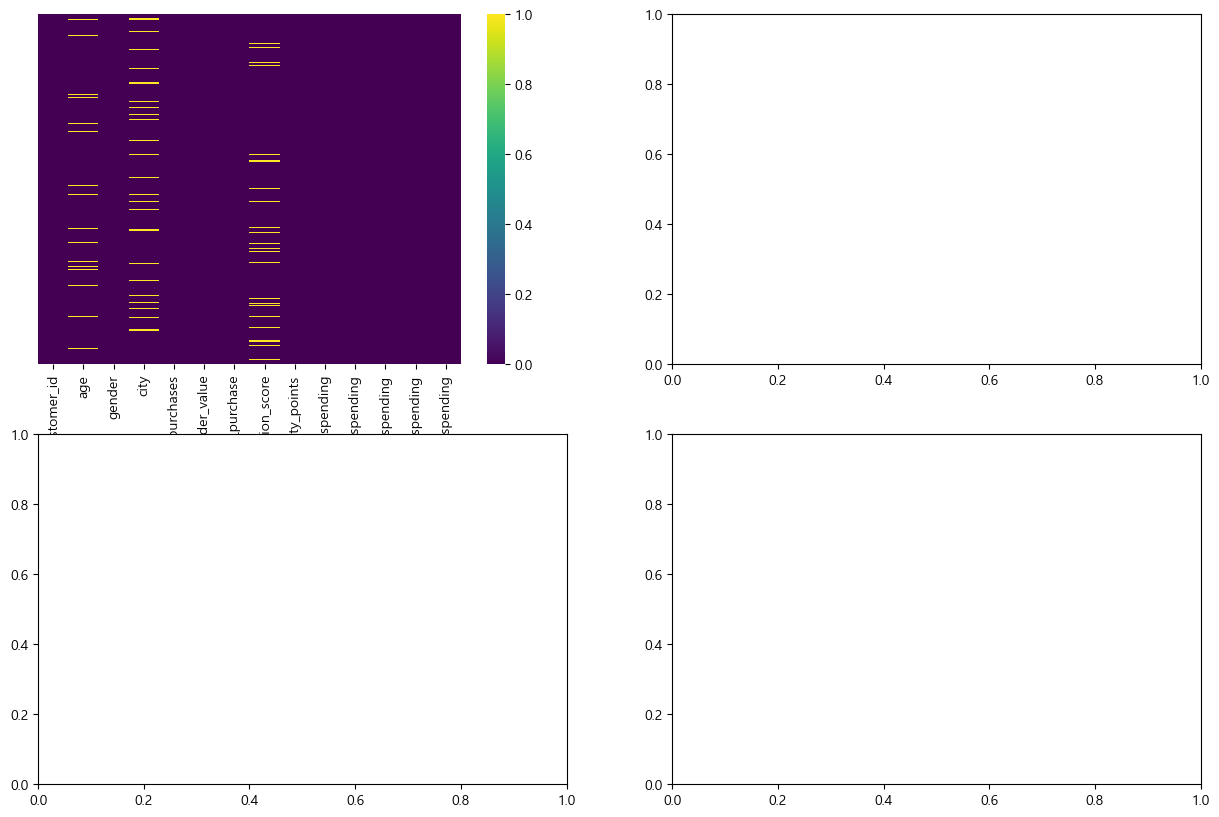

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings, re
warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    message=r"Glyph .* missing from font\(s\) DejaVu Sans"
) 

def analyze_missing_patterns(df:pd.DataFrame):
    """결측값 패턴 종합 분석"""
    print(' === 결측값 패턴 분석 ===')
    missing_info = df.isnull().sum()
    missing_pct = (missing_info / len(df)) ** 100
    missing_summary = pd.DataFrame({
        '결측수': missing_info,
        '결측율(%)': missing_pct.round(2)
    })
    missing_summary = missing_summary[missing_summary['결측수']>0].sort_values('결측수',ascending = False)
    print('변수별 결측 현황')
    display(missing_summary)
    # 결측값 시각화
    fig, axes = plt.subplots(2,2, figsize = (15, 10))
    a1, a2, a3, a4 = axes[0,0], axes[0,1], axes[1,0], axes[1,1]
    sns.heatmap(df.isna(), yticklabels=False, cbar = True, cmap = 'viridis', ax = a1)
# 2. 변수별 결측률 바 차트
    if len(missing_summary):  # missing_summary 의 길이가 0이 아니라면 -> 내용이 있다면
        missing_summary['결측률(%)'].plot(kind='bar', color='coral', ax=a2)
        a2.set_title('변수별 결측률')
        a2.set_ylabel('결측률(%)')
        a2.tick_params(axis='x', rotation=0)
    # 3. 결측값 조합 패턴
    # 결측값이 있는 컬럼들만 T/F 표시
    missing_pattern = df[df.columns[df.isna().any()]].isna()
    if len(missing_pattern):
        # 결측 패턴 조합 상위 10개
        pattern_counts = missing_pattern.value_counts().head(10)
        pattern_counts.plot(kind = 'bar', color = 'lightblue', ax = a3)
        a3.set_title('결측패턴 조합(상위 10)')
        a3.set_ylabel('빈도')

    # 4. 결측값과 다른 변수의 관계 (MAR - 조건부 결측 검증) -> 범용적으로 사용하기 애매
    num_cols = df.select_dtypes(include = 'number').columns.tolist()
    num_missing = missing_summary.loc[missing_summary.index.intersection(num_cols)]
    if len(num_cols) >= 2:
        # 결측률 높은 변수 1개, 낮은 변수 1개를 골라서
        missing_rank = missing_pct[num_cols].sort_values(ascending = False)
        
        # 결측률 높은 변수 1개, 낮은 변수 1개
        col1, col2 = num_missing.index[0], num_missing.index[-1]
        target_missing = df[col1].isna()

        df_temp = df.copy()
        df_temp['target_missing'] = target_missing
        sns.barplot( # 검정 선은 신뢰구간 95% 
            data = df_temp,
            x = 'target_missing',
            y = col2,
            palette = {'False':'green', 'True' : 'red'},
            ax = a4
        )
        a4.set_title(f'{col1} 결측여부별 {col2}평균')
        a4.set_xlabel(f'{col1} 결측 여부(T: 결측)')
        a4.set_ylabel(f'{col2} 평균')

        df_temp = df.copy()
        df_temp['target_missing'] = target_missing
        display(df_temp)

        print(col2)

    
analyze_missing_patterns(ecommerce)
plt.tight_layout()

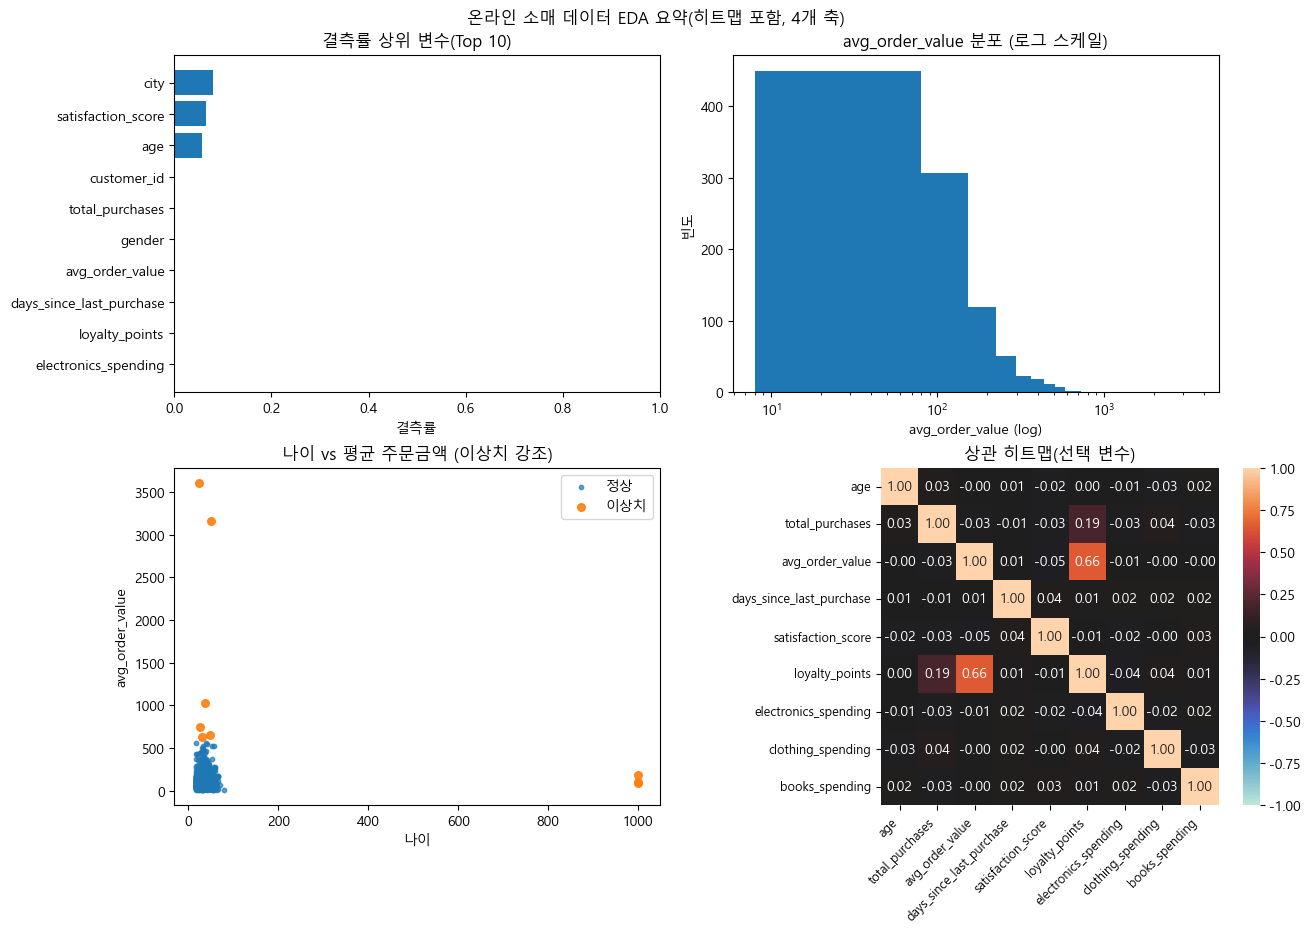

In [43]:
# ==== 기본 설정: 한글 폰트 + 마이너스 부호 ====
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rcParams

rcParams["font.family"] = "Malgun Gothic"   # Windows 기본 한글 폰트
rcParams["axes.unicode_minus"] = False

# 분석 대상
df = ecommerce.copy()

# ===== 사전 계산 =====
# 1) 결측률
missing_rate = df.isna().mean().sort_values(ascending=False)

# 2) 숫자형 칼럼
num_cols = df.select_dtypes(include="number").columns.tolist()

# 3) 이상치 마스크 (나이 120세 초과 또는 AOV 상위 1%)
aov_q99 = df["avg_order_value"].quantile(0.99)
outlier_mask = (df["age"] > 120) | (df["avg_order_value"] > aov_q99)

# 4) 히트맵 대상 변수(필요 시 여기서 추가/삭제)
heat_vars = [
    "age", "total_purchases", "avg_order_value",
    "days_since_last_purchase", "satisfaction_score", "loyalty_points",
    "electronics_spending", "clothing_spending", "books_spending"
]
heat_vars = [c for c in heat_vars if c in df.columns]
corr = df[heat_vars].corr()

# ===== 2×2 서브플롯 =====
fig, axes = plt.subplots(2, 2, figsize=(13, 9), constrained_layout=True)
(ax1, ax2), (ax3, ax4) = axes

# (1) 결측률 상위 변수 (Top 10)
topk = 10
mr_topk = missing_rate.head(topk)
ax1.barh(mr_topk.index[::-1], mr_topk.values[::-1])
ax1.set_title("결측률 상위 변수(Top 10)")
ax1.set_xlabel("결측률")
ax1.set_xlim(0, 1)

# (2) 평균 주문금액 분포 (히스토그램, 로그 x축)
aov = df["avg_order_value"].dropna()
ax2.hist(aov, bins=50)
ax2.set_xscale("log")
ax2.set_title("avg_order_value 분포 (로그 스케일)")
ax2.set_xlabel("avg_order_value (log)")
ax2.set_ylabel("빈도")

# (3) 나이 vs 평균 주문금액 (이상치 강조)
mask_ok = (~outlier_mask) & df["age"].notna() & df["avg_order_value"].notna()
ax3.scatter(df.loc[mask_ok, "age"], df.loc[mask_ok, "avg_order_value"], s=10, alpha=0.7, label="정상")
mask_out = outlier_mask & df["age"].notna() & df["avg_order_value"].notna()
ax3.scatter(df.loc[mask_out, "age"], df.loc[mask_out, "avg_order_value"], s=30, alpha=0.9, label="이상치")
ax3.set_title("나이 vs 평균 주문금액 (이상치 강조)")
ax3.set_xlabel("나이")
ax3.set_ylabel("avg_order_value")
ax3.legend(loc="best")

# (4) 상관 히트맵(선택 변수)
sns.heatmap(
    corr, ax=ax4, annot=True, fmt=".2f",
    vmin=-1, vmax=1, center=0, square=True, cbar=True
)
ax4.set_title("상관 히트맵(선택 변수)")
ax4.tick_params(labelsize=9)
plt.setp(ax4.get_xticklabels(), rotation=45, ha="right")

# 전체 제목
fig.suptitle("온라인 소매 데이터 EDA 요약(히트맵 포함, 4개 축)", y=1.02)
plt.show()


=== 결측값 패턴 분석 ===
변수별 결측 현황


,결측수,결측률(%)
city,80,8.0
satisfaction_score,66,6.6
age,56,5.6


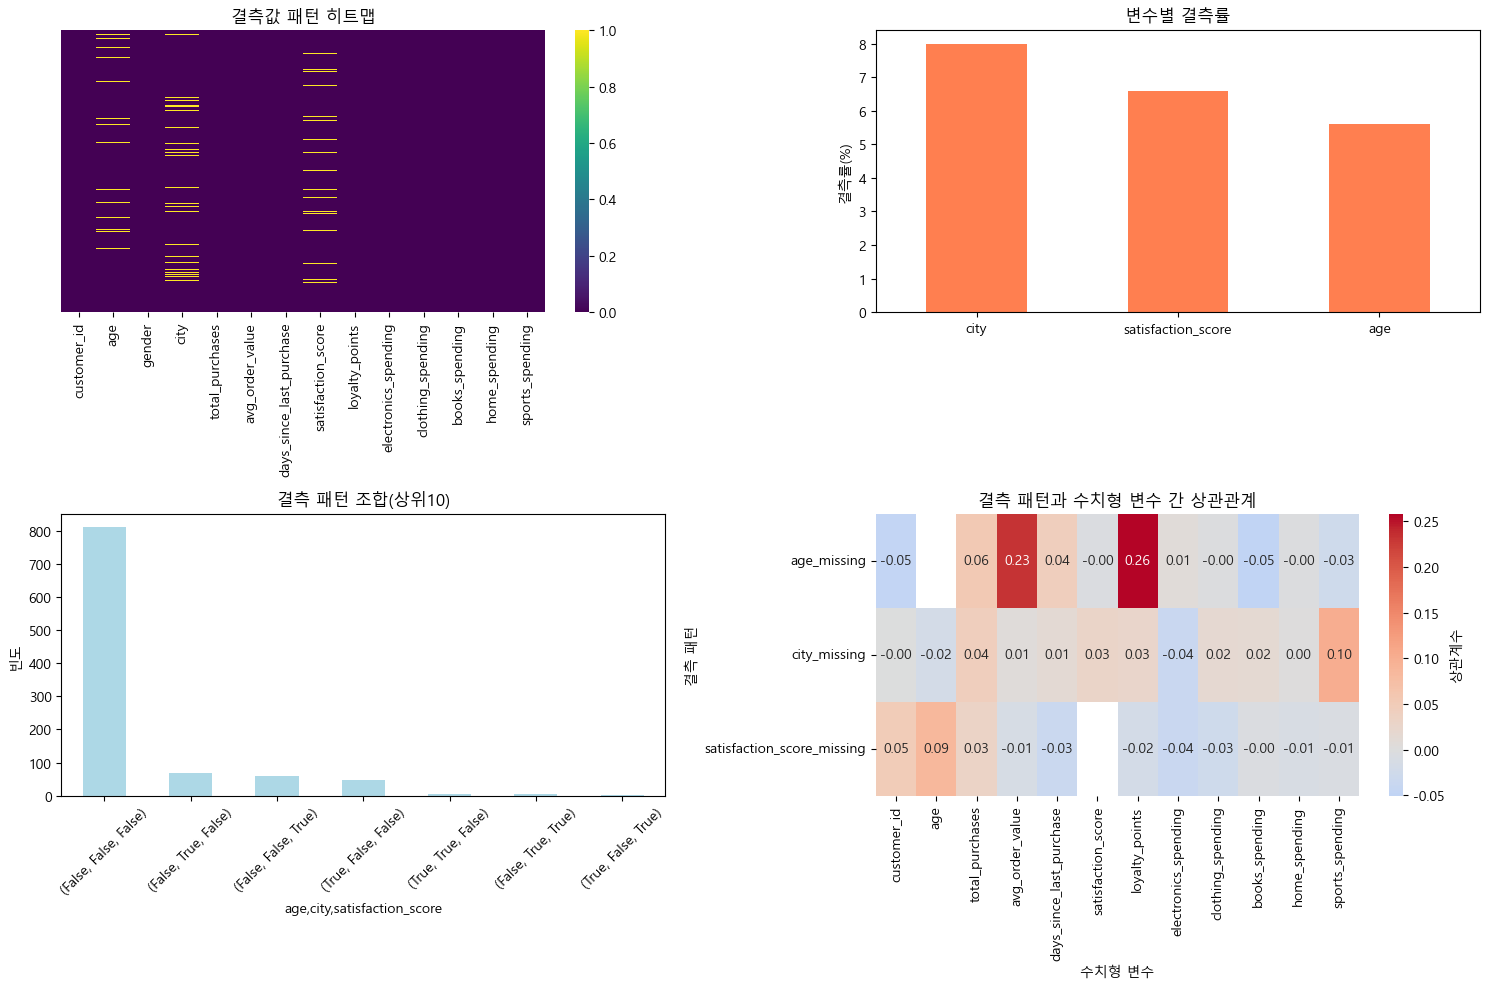

,결측수,결측률(%)
city,80,8.0
satisfaction_score,66,6.6
age,56,5.6


In [56]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


def analyze_missing_patterns(df: pd.DataFrame):
    """결측값 패턴 종합 분석"""
    print('=== 결측값 패턴 분석 ===')
    missing_info = df.isna().sum()
    missing_pct = (missing_info / len(df)) * 100
    missing_summary = pd.DataFrame({
        '결측수': missing_info,
        '결측률(%)': missing_pct.round(2)
    })
    missing_summary = missing_summary[missing_summary['결측수'] > 0].sort_values('결측수', ascending=False)
    print('변수별 결측 현황')
    display(missing_summary)

    # 결측값 시각화
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    a1, a2, a3, a4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]

    # 1. 결측값 히트맵
    sns.heatmap(df.isna(), yticklabels=False, cbar=True, cmap='viridis', ax=a1)
    a1.set_title('결측값 패턴 히트맵')

    # 2. 변수별 결측률 바 차트
    if len(missing_summary):  # missing_summary 가 비어있지 않으면
        missing_summary['결측률(%)'].plot(kind='bar', color='coral', ax=a2)
        a2.set_title('변수별 결측률')
        a2.set_ylabel('결측률(%)')
        a2.tick_params(axis='x', rotation=0)

    # 3. 결측값 조합 패턴
    missing_pattern = df[df.columns[df.isna().any()]].isna()
    if len(missing_pattern.columns) > 0:  # 수정: len(missing_pattern) -> len(missing_pattern.columns)
        pattern_counts = missing_pattern.value_counts().head(10)
        if len(pattern_counts) > 0:  # pattern_counts가 비어있지 않은 경우에만 플롯
            pattern_counts.plot(kind='bar', color='lightblue', ax=a3)
            a3.set_title('결측 패턴 조합(상위10)')
            a3.set_ylabel('빈도')
            a3.tick_params(axis='x', rotation=45)
        else:
            a3.text(0.5, 0.5, '결측 패턴 없음', ha='center', va='center')
            a3.axis('off')
    else:
        a3.text(0.5, 0.5, '결측값 없음', ha='center', va='center')
        a3.axis('off')


    # 4. 결측 변수별 결측 여부(0/1)와 다른 수치형 변수 간 상관관계 히트맵 시각화
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    missing_cols = df.columns[df.isna().any()].tolist()

    if len(numeric_cols) > 0 and len(missing_cols) > 0:
        # 결측값을 0/1로 변환한 DataFrame 생성
        missing_binary = df[missing_cols].isna().astype(int)
        missing_binary.columns = [f'{col}_missing' for col in missing_binary.columns]
        
        # 수치형 변수와 결측 패턴 변수 결합
        corr_data = pd.concat([df[numeric_cols], missing_binary], axis=1)
        
        # 상관계수 계산
        correlation_matrix = corr_data.corr()
        
        # 결측 패턴 변수와 수치형 변수 간의 상관관계만 추출
        missing_numeric_corr = correlation_matrix.loc[
            missing_binary.columns, 
            numeric_cols
        ]
        
        # 상관관계가 있는 경우에만 히트맵 그리기
        if missing_numeric_corr.shape[0] > 0 and missing_numeric_corr.shape[1] > 0:
            sns.heatmap(missing_numeric_corr, 
                    annot=True, 
                    cmap='coolwarm', 
                    center=0,
                    fmt='.2f',
                    ax=a4,
                    cbar_kws={'label': '상관계수'})
            a4.set_title('결측 패턴과 수치형 변수 간 상관관계')
            a4.set_xlabel('수치형 변수')
            a4.set_ylabel('결측 패턴')
        else:
            a4.text(0.5, 0.5, '분석할 상관관계 없음', ha='center', va='center')
            a4.axis('off')
    else:
        a4.text(0.5, 0.5, '수치형 변수 또는\n결측값이 없음', ha='center', va='center')
        a4.axis('off')

    plt.tight_layout()
    plt.show()

    return missing_summary

analyze_missing_patterns(ecommerce)

=== 결측값 패턴 분석 ===
변수별 결측 현황


,결측수,결측률(%)
city,80,8.0
satisfaction_score,66,6.6
age,56,5.6


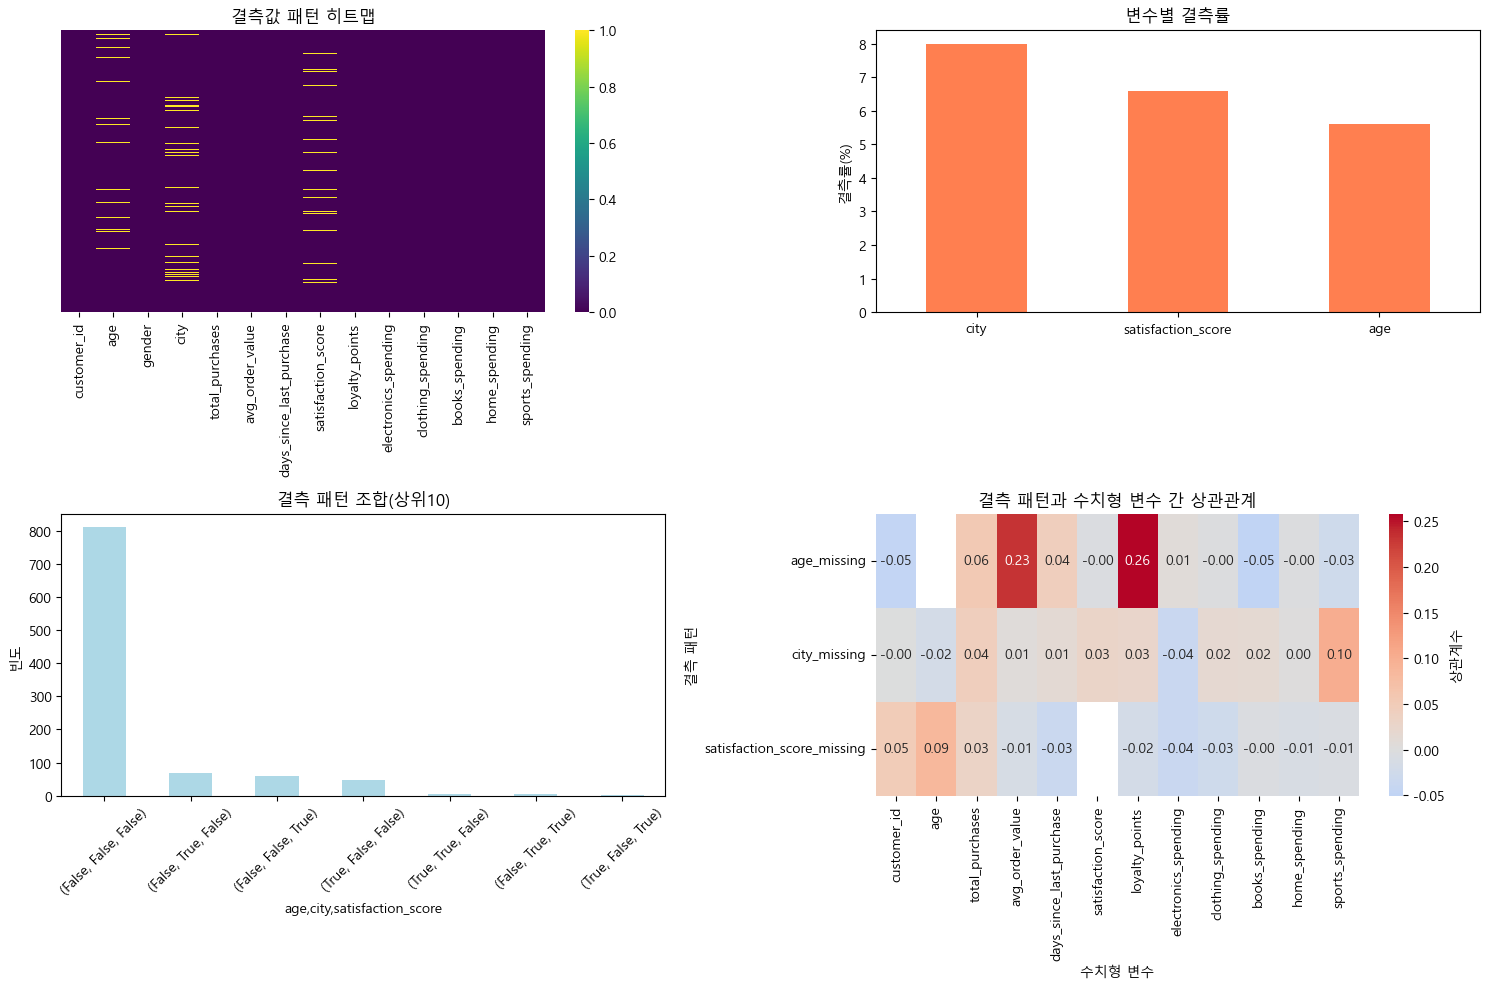

,결측수,결측률(%)
city,80,8.0
satisfaction_score,66,6.6
age,56,5.6


In [60]:

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


def analyze_missing_patterns(df: pd.DataFrame):
    """결측값 패턴 종합 분석"""
    print('=== 결측값 패턴 분석 ===')
    missing_info = df.isna().sum()
    missing_pct = (missing_info / len(df)) * 100
    missing_summary = pd.DataFrame({
        '결측수': missing_info,
        '결측률(%)': missing_pct.round(2)
    })
    missing_summary = missing_summary[missing_summary['결측수'] > 0].sort_values('결측수', ascending=False)
    print('변수별 결측 현황')
    display(missing_summary)

    # 결측값 시각화
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    a1, a2, a3, a4 = axes[0, 0], axes[0, 1], axes[1, 0], axes[1, 1]

    # 1. 결측값 히트맵
    sns.heatmap(df.isna(), yticklabels=False, cbar=True, cmap='viridis', ax=a1)
    a1.set_title('결측값 패턴 히트맵')

    # 2. 변수별 결측률 바 차트
    if len(missing_summary):  # missing_summary 가 비어있지 않으면
        missing_summary['결측률(%)'].plot(kind='bar', color='coral', ax=a2)
        a2.set_title('변수별 결측률')
        a2.set_ylabel('결측률(%)')
        a2.tick_params(axis='x', rotation=0)

    # 3. 결측값 조합 패턴
    missing_pattern = df[df.columns[df.isna().any()]].isna()
    if len(missing_pattern.columns) > 0:  # 수정: len(missing_pattern) -> len(missing_pattern.columns)
        pattern_counts = missing_pattern.value_counts().head(10)
        if len(pattern_counts) > 0:  # pattern_counts가 비어있지 않은 경우에만 플롯
            pattern_counts.plot(kind='bar', color='lightblue', ax=a3)
            a3.set_title('결측 패턴 조합(상위10)')
            a3.set_ylabel('빈도')
            a3.tick_params(axis='x', rotation=45)
        else:
            a3.text(0.5, 0.5, '결측 패턴 없음', ha='center', va='center')
            a3.axis('off')
    else:
        a3.text(0.5, 0.5, '결측값 없음', ha='center', va='center')
        a3.axis('off')


    # 4. 결측 변수별 결측 여부(0/1)와 다른 수치형 변수 간 상관관계 히트맵 시각화
    numeric_cols = df.select_dtypes(include='number').columns.tolist()
    missing_cols = df.columns[df.isna().any()].tolist()

    if len(numeric_cols) > 0 and len(missing_cols) > 0:
        # 결측값을 0/1로 변환한 DataFrame 생성
        missing_binary = df[missing_cols].isna().astype(int)
        missing_binary.columns = [f'{col}_missing' for col in missing_binary.columns]
        
        # 수치형 변수와 결측 패턴 변수 결합
        corr_data = pd.concat([df[numeric_cols], missing_binary], axis=1)
        
        # 상관계수 계산
        correlation_matrix = corr_data.corr()
        
        # 결측 패턴 변수와 수치형 변수 간의 상관관계만 추출
        missing_numeric_corr = correlation_matrix.loc[
            missing_binary.columns, 
            numeric_cols
        ]
        
        # 상관관계가 있는 경우에만 히트맵 그리기
        if missing_numeric_corr.shape[0] > 0 and missing_numeric_corr.shape[1] > 0:
            sns.heatmap(missing_numeric_corr, 
                    annot=True, 
                    cmap='coolwarm', 
                    center=0,
                    fmt='.2f',
                    ax=a4,
                    cbar_kws={'label': '상관계수'})
            a4.set_title('결측 패턴과 수치형 변수 간 상관관계')
            a4.set_xlabel('수치형 변수')
            a4.set_ylabel('결측 패턴')
        else:
            a4.text(0.5, 0.5, '분석할 상관관계 없음', ha='center', va='center')
            a4.axis('off')
    else:
        a4.text(0.5, 0.5, '수치형 변수 또는\n결측값이 없음', ha='center', va='center')
        a4.axis('off')

    plt.tight_layout()
    plt.show()

    return missing_summary

analyze_missing_patterns(ecommerce)

In [61]:
from scipy.stats import chi2_contingency
# 결측 메커니즘 진단

print('=== 결측 메커니즘 진단 ===')

# MAR 패턴 Missing At Random -> (조건부) 무작위 결측
# MAR 패턴 검증 : 나이 결측과 구매액의 관계

print('나이(age) 결측 메커니즘 분석')

# 구매액 분위별 나이 결측률
df_temp = ecommerce.copy()
df_temp['spending_quartile'] = pd.qcut(df_temp['avg_order_value'].dropna(), q=4, labels=['하위25', '하위50', '상위50', '상위25'])
age_missing_my_spending = df_temp.groupby('spending_quartile')['age'].apply(lambda x: x.isnull().mean())
print('\n구매액 분위별 나이 결측률')
for key, value in age_missing_my_spending.items():
    print(f'{key}: {value:.1%}')

con_table = pd.crosstab(df_temp['spending_quartile'], df_temp['age'].isnull())
chi2, p_value, _, _ = chi2_contingency(con_table)

print(f'\n카이제곱 통계량: {chi2:.3f}, p-value: {p_value:.4f}')
if p_value < 0.05:
    print('✅ MAR 패턴 확인: 구매액에 따라 나이 결측률이 유의미하게 다름')
else:
    print('❌ MCAR 가능성 있 음: 구매액과 나이 결측이 독립적')


# 만족도 결측 패턴 분석
print('\n만족도(satisfaction_score) 결측 메커니즘 분석')

# 1. 연령대별 만족도 결측률 [0, 30, 50, 100] - ['청년층 ~30', '중년층 31~50', '장년층 51+']
# 각 구간마다 만족도가 없는 사람들의 %를 구해서 print


# 2. 성별 만족도 결측률

=== 결측 메커니즘 진단 ===
나이(age) 결측 메커니즘 분석

구매액 분위별 나이 결측률
하위25: 0.0%
하위50: 0.0%
상위50: 0.0%
상위25: 22.4%

카이제곱 통계량: 177.966, p-value: 0.0000
✅ MAR 패턴 확인: 구매액에 따라 나이 결측률이 유의미하게 다름

만족도(satisfaction_score) 결측 메커니즘 분석


In [ ]:
import pandas as pd

def missing_rate_by_age_band(
    df: pd.DataFrame,
    age_col: str = "age",
    target_col: str = "satisfaction_score",
    bins = [0, 30, 50, 100],
    labels = ['청년층 ~30', '중년층 31~50', '장년층 51+'],
    exclude_out_of_range: bool = True,   # 0~100 밖(예: 999세) 제외
    return_df: bool = False
):
    """연령대별 target_col(예: 만족도) 결측률(%)을 계산하고 print."""
    # 1) 연령 숫자화
    age = pd.to_numeric(df[age_col], errors="coerce")

    # 2) 분석 대상 행 선택(연령 구간 밖은 기본 제외)
    if exclude_out_of_range:
        in_range = age.between(bins[0], bins[-1], inclusive="both")
    else:
        in_range = age.notna()

    tmp = df.loc[in_range, [age_col, target_col]].copy()
    tmp["연령대"] = pd.cut(tmp[age_col], bins=bins, labels=labels,
                        right=True, include_lowest=True)

    # 3) 연령대별 결측률(%) 및 표본수
    grp = tmp.groupby("연령대")[target_col]
    result = pd.DataFrame({
        "표본수": grp.size(),
        "결측률(%)": (grp.apply(lambda x: x.isna().mean()*100)).round(2)
    }).reset_index()

    # 4) 출력
    for _, row in result.iterrows():
        print(f"{row['연령대']}: {row['결측률(%)']:.2f}% (n={int(row['표본수'])})")

    return result if return_df else None


In [63]:
missing_rate_by_age_band(ecommerce)

청년층 ~30: 4.02% (n=348)
중년층 31~50: 5.80% (n=500)
장년층 51+: 20.43% (n=93)


In [64]:
ecommerce.isna().sum()

customer_id                  0
age                         56
gender                       0
city                        80
total_purchases              0
avg_order_value              0
days_since_last_purchase     0
satisfaction_score          66
loyalty_points               0
electronics_spending         0
clothing_spending            0
books_spending               0
home_spending                0
sports_spending              0
dtype: int64

In [ ]:
if ecommerce['satisfaction_score'].isnull().sum() > 0:
    # 1. 연령대별 만족도 결측률 [0, 30, 50, 100] - ['청년층 ~30','중년층 31~50']
    df_temp = ecommerce.copy()
    df_temp['age_group'] = pd.cut(df_temp['age'], bins = [0, 30, 50, 200], labels = ['~30','31~50','50+'])
    ss_missing_by_age = df_temp.groupby('age_group')['satisfaction_score'].apply(lambda x: x.isnull().mean())
    print("\n연령대별 만족도 결측률")
    for age_group, rate in ss_missing_by_age.items():
        print(f'{age_group}:{rate:.2%}') 
    # 2. 성별 만족도 결측률
    ss_missing_by_gender = df


연령대별 만족도 결측률
~30:4.02%
31~50:5.80%
50+:20.43%


### 고급 결측값 대체 기법

In [69]:
%pip install -q scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
# Impute -> 대체하다
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 숫자형 컬럼들
numeric_cols = ['age', 'total_purchases', 'avg_order_value',
       'days_since_last_purchase', 'satisfaction_score',]

df_numeric = ecommerce[numeric_cols]
print('원본 데이터 결측률')
for col in numeric_cols:
    missing_rate = df_numeric[col].isnull().mean()
    if missing_rate > 0:
        print(f'  {col}: {missing_rate:.2%}')

# 1. 컬럼별 결측을 모두 평균으로 대체
imputer_mean = SimpleImputer(strategy='mean')
df_mean = df_numeric.copy()
df_mean[numeric_cols] = imputer_mean.fit_transform(df_numeric[numeric_cols])

# 2. KNN 대체 -> K-Nearest Neighbors
imputer_knn = KNNImputer(n_neighbors=5)
df_knn = df_numeric.copy()
df_knn[numeric_cols] = imputer_knn.fit_transform(df_numeric[numeric_cols])

# 3. MICE 대체 -> Multiple Imputation by Chained Equations (결측이 있는 변수를 다른 변수들을 이용해 회귀모델 예측)
# 변수간 상관관계가 약한경우 -> 평균으로 도달하게 됨.
imputer_mice = IterativeImputer(random_state=42, max_iter=20)
df_mice = df_numeric.copy()
df_mice[numeric_cols] = imputer_mice.fit_transform(df_numeric[numeric_cols])

원본 데이터 결측률
  age: 5.60%
  satisfaction_score: 6.60%


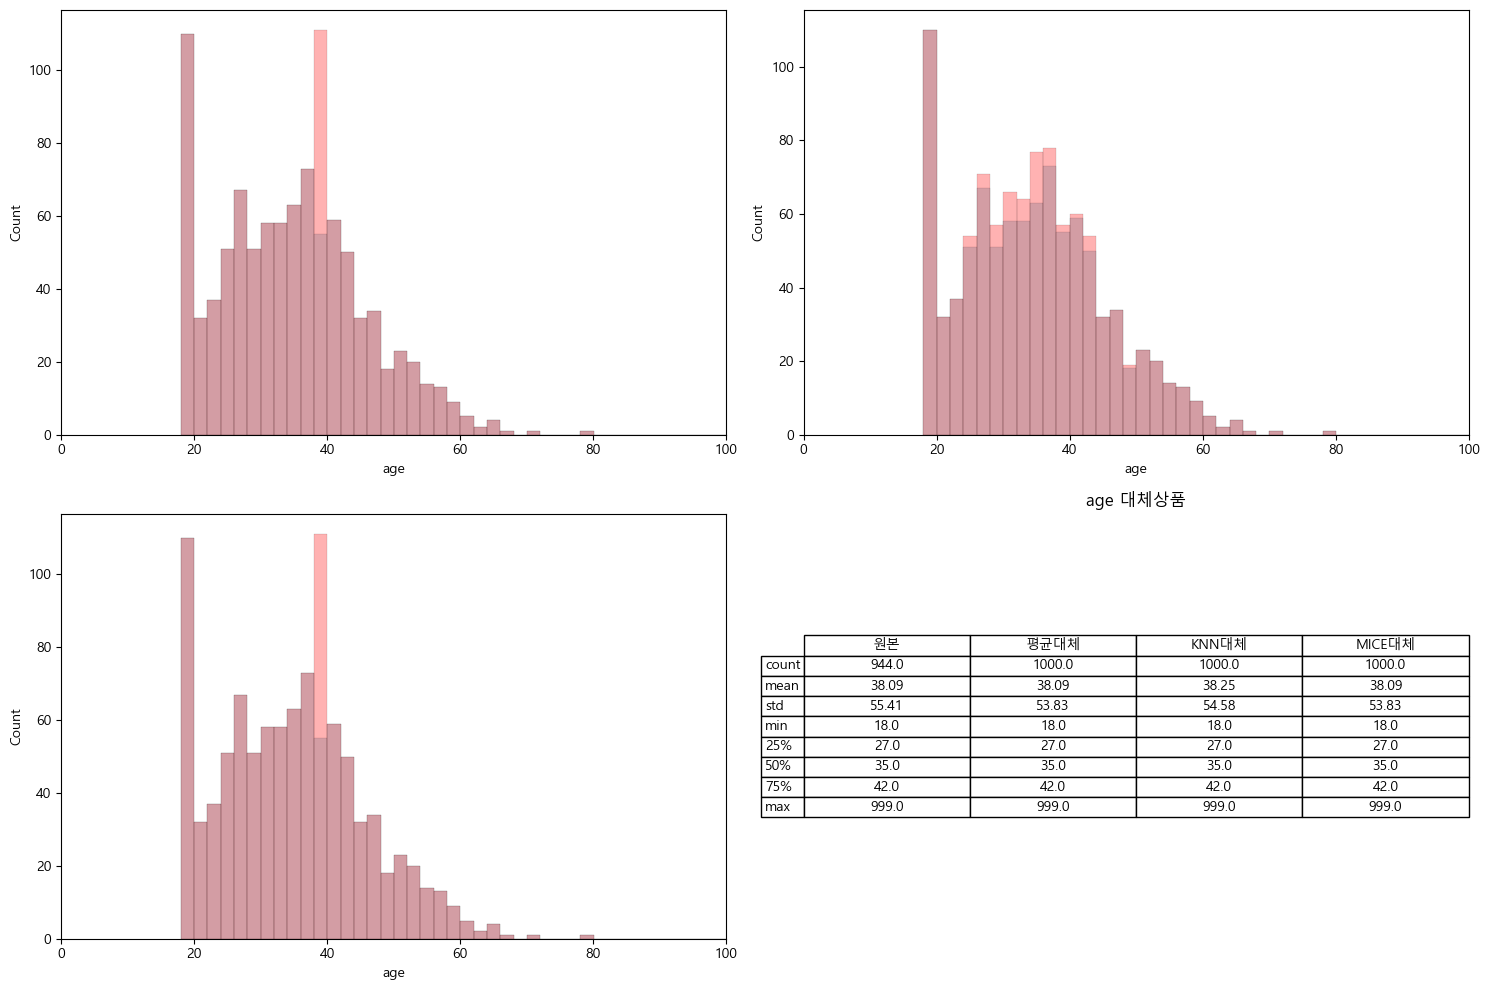

In [87]:
# 대체 결과 비교 시각화
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
a1, a2, a3, a4 = axes[0,0], axes[0,1], axes[1,0], axes[1,1]

# age 변수 대체 결과
variable = 'age'

if df_numeric[variable].isnull().sum() > 0:
    x_min, x_max = 0, 100
    # 원본-평균대체
    sns.histplot(df_numeric[variable], binwidth=2, kde=False, ax=a1, color='lightblue', label='원본')
    sns.histplot(df_mean[variable], binwidth=2, kde=False, ax=a1, color='red', label='평균대체', alpha=0.3)
    a1.set_xlim(x_min, x_max)
    
    # 원본-KNN대체
    sns.histplot(df_numeric[variable], binwidth=2, kde=False, ax=a2, color='lightblue', label='원본')
    sns.histplot(df_knn[variable], binwidth=2, kde=False, ax=a2, color='red', label='KNN', alpha=0.3)
    a2.set_xlim(x_min, x_max)

    # 원본-MICE대체
    # 변수간 상관관계가 약한 경우 -> 평균으로 도달하게 됨.

    sns.histplot(df_numeric[variable], binwidth=2, kde=False, ax=a3, color='lightblue', label='원본')
    sns.histplot(df_mice[variable], binwidth=2, kde=False, ax=a3, color='red', label='MICE', alpha=0.3)
    a3.set_xlim(x_min, x_max)

    # 대체 전후 통계량 비교
    comparison_stats = pd.DataFrame({
        '원본': df_numeric[variable].describe(),
        '평균대체': df_mean[variable].describe(),
        'KNN대체': df_knn[variable].describe(),
        'MICE대체': df_mice[variable].describe(),
    }).round(2)
# 대체 전후 통계량 비교
comparsion_stats = pd.DataFrame({
    '원본': df_numeric[variable].describe(),
    '평균대체': df_mean[variable].describe(),
    'KNN대체': df_knn[variable].describe(),
    'MICE대체' : df_mice[variable].describe(),
}).round(2)

a4.axis('off')
a4.table(
    cellText = comparsion_stats.values,
    rowLabels = comparison_stats.index,
    colLabels = comparison_stats.columns,
    cellLoc = 'center',
    loc = 'center'
)
a4.set_title(f'{variable} 대체상품')
plt.tight_layout()
plt.show()

## 대체 품질 평가

In [102]:
print('=== 대체 품질 평가 ===')
evaluation_results = []

# df_mean, df_knn, df_mice
original_df = df_numeric
method_names = ['평균대체','KNN대체','MICE대체']
imputed_dfs = [df_mean,df_knn,df_mice]

for method, imputed_df in zip(method_names, imputed_dfs):
    
    # 1. 분포 유사성 평가
    for col in ['age','satisfaction_score']:
        # 결측치가 있다면,
        if original_df[col].isnull().sum():
            original_stats = original_df[col].dropna().describe()
            imputed_stats = imputed_df[col].describe()

            # 평균 차이
            mean_diff = abs(original_stats['mean'] - imputed_stats['mean'])/original_stats['mean'] * 100
            # 표준편차 차이
            std_diff = abs(original_stats['std'] - imputed_stats['std'])/original_stats['std'] * 100

            evaluation_results.append({
                '방법': method,
                '변수': col,
                '평균차이(%)': mean_diff,
                '표준편차차이(%)': std_diff,
            })
    # 2. 상관관계 보존 평가
    # age, s.s <-> avg_order_value(상대 컬럼은 임의 선정)
    original_corr = original_df[['age','avg_order_value']].corr().iloc[0,1] # 결측치 포함되어 있음
    imputed_corr = imputed_df[['age','avg_order_value']].dropna().corr().iloc[0,1] # 결측치 대체 후
    
    # 상관관계 유지
    og_corr_preservation  = abs(original_corr- imputed_corr)/ abs(original_corr) * 100

    evaluation_results.append({
        '방법': method,
        '변수': 'Age-구매액 상관관계',
        '원본상관계수': og_corr_preservation,
        '대체상관계수' : imputed_corr,
        '상관계수보존도(%)': 100 - og_corr_preservation,
    })
eval_df = pd.DataFrame(evaluation_results) #나이 : 구매 비례
print('1.분포 보존 성능')
dist_eval = eval_df[eval_df['변수'].isin(('age','satisfaction_score'))]
dis1 = dist_eval[['방법','변수','평균차이(%)','표준편차차이(%)']].to_string(index = False)
print('\n2. 상관관계 보존성능')
corr_eval = eval_df[eval_df['변수'].isin(('Age-구매액 상관관계','satisfaction_score-구매액 상관관계'))]
for _, row in corr_eval.iterrows():
    print(f'{row['방법']}: 보존도{row['상관계수보존도']:.1f}')



=== 대체 품질 평가 ===
1.분포 보존 성능

2. 상관관계 보존성능


KeyError: '상관계수보존도'

## 이상값 탐지 및 처리

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


# 온라인 소매 데이터 생성 (컬럼명 소문자 버전)
np.random.seed(42)
n_customers = 1000

def create_realistic_ecommerce_data(n=1000):
    """실제와 유사한 전자상거래 데이터 생성 (소문자 컬럼명)"""
    
    data = {}
    
    # 고객 기본 정보
    data['customer_id'] = range(1, n+1)
    data['age'] = np.random.normal(35, 12, n).clip(18, 80).astype(int)
    data['gender'] = np.random.choice(['M', 'F'], n, p=[0.45, 0.55])
    data['city'] = np.random.choice(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju'], 
                                   n, p=[0.4, 0.2, 0.15, 0.15, 0.1])
    
    # 구매 행동 데이터
    data['total_purchases'] = np.random.poisson(8, n) + 1
    data['avg_order_value'] = np.random.lognormal(4.5, 0.8, n).round(2)
    data['days_since_last_purchase'] = np.random.exponential(30, n).astype(int)
    
    # 만족도 및 충성도
    data['satisfaction_score'] = np.random.normal(3.8, 1.2, n).clip(1, 5).round(1)
    data['loyalty_points'] = (data['total_purchases'] * data['avg_order_value'] * 0.1 + 
                             np.random.normal(0, 100, n)).clip(0, None).round(0)
    
    # 카테고리별 구매 금액
    categories = ['electronics', 'clothing', 'books', 'home', 'sports']
    for cat in categories:
        # 일부 고객은 특정 카테고리에서 구매하지 않음
        values = np.random.lognormal(3, 1, n)
        # 30% 확률로 해당 카테고리 구매 안 함 (0으로 설정)
        mask = np.random.random(n) < 0.3
        values[mask] = 0
        data[f'{cat}_spending'] = values.round(2)
    
    df = pd.DataFrame(data)
    
    # 의도적 결측값 생성 (실제 상황 모방)
    
    # 1. MCAR: 완전 무작위 결측 (시스템 오류)
    missing_indices = np.random.choice(df.index, size=int(0.05 * len(df)), replace=False)
    df.loc[missing_indices, 'satisfaction_score'] = np.nan
    
    # 2. MAR: 조건부 결측 (나이가 높을수록 만족도 응답 거부율 증가)
    elderly_mask = df['age'] > 50
    elderly_missing = np.random.random(elderly_mask.sum()) < 0.15  
    elderly_indices = df[elderly_mask].index[elderly_missing]
    df.loc[elderly_indices, 'satisfaction_score'] = np.nan
    
    # 3. MNAR: 결측 자체가 의미 (높은 소득자들이 개인정보 비공개)
    high_spenders = df['avg_order_value'] > df['avg_order_value'].quantile(0.8)
    high_spender_missing = np.random.random(high_spenders.sum()) < 0.25
    high_spender_indices = df[high_spenders].index[high_spender_missing]
    df.loc[high_spender_indices, 'age'] = np.nan
    
    # 도시 정보 일부 결측 (배송지 미입력)
    city_missing = np.random.choice(df.index, size=int(0.08 * len(df)), replace=False)
    df.loc[city_missing, 'city'] = np.nan
    
    # 의도적 이상값 생성
    
    # 1. 데이터 입력 오류 (나이 999살)
    error_indices = np.random.choice(df.index, size=3, replace=False)
    df.loc[error_indices, 'age'] = 999
    
    # 2. 비즈니스 이상값 (VIP 고객의 극도로 높은 구매액)
    vip_indices = np.random.choice(df.index, size=5, replace=False)
    df.loc[vip_indices, 'avg_order_value'] *= 20
    df.loc[vip_indices, 'loyalty_points'] *= 10
    
    # 3. 시스템 버그로 인한 음수값
    bug_indices = np.random.choice(df.index, size=2, replace=False) 
    df.loc[bug_indices, 'days_since_last_purchase'] = -1
    
    return df

# 데이터 생성
ecommerce = create_realistic_ecommerce_data(1000)

print("=== 온라인 소매 데이터 개요 ===")
print(f"데이터 크기: {ecommerce.shape}")
print("\n데이터 샘플:")
display(ecommerce.head(10))

print(f"\n기본 정보:")
print(ecommerce.info())

=== 온라인 소매 데이터 개요 ===
데이터 크기: (1000, 14)

데이터 샘플:


,customer_id,age,gender,city,total_purchases,avg_order_value,days_since_last_purchase,satisfaction_score,loyalty_points,electronics_spending,clothing_spending,books_spending,home_spending,sports_spending
0,1,40.0,M,Seoul,9,80.62,8,3.8,86.0,18.44,0.00,10.65,0.00,184.52
1,2,33.0,M,Seoul,9,27.69,4,2.0,0.0,46.54,0.00,210.79,17.13,20.43
2,3,42.0,F,Seoul,5,71.05,58,2.5,0.0,0.00,4.54,0.00,9.48,0.00
3,4,53.0,F,Seoul,11,158.62,24,1.8,318.0,26.55,25.55,3.49,5.04,41.76
4,5,32.0,M,Incheon,14,79.10,59,5.0,228.0,23.31,6.52,6.34,29.39,18.09
5,6,32.0,F,Busan,7,75.49,53,3.2,151.0,48.28,4.30,31.78,0.00,10.51
6,7,53.0,M,Busan,10,92.04,9,5.0,123.0,0.00,19.93,6.88,109.88,0.00
7,8,44.0,F,Seoul,10,95.80,23,1.0,135.0,37.61,23.63,24.12,13.02,0.00
8,9,29.0,F,Gwangju,10,156.80,2,5.0,76.0,24.55,18.20,20.30,3.03,13.65
9,10,41.0,F,Seoul,4,157.57,74,3.7,77.0,0.00,31.13,0.00,0.00,0.00



기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               1000 non-null   int64  
 1   age                       944 non-null    float64
 2   gender                    1000 non-null   object 
 3   city                      920 non-null    object 
 4   total_purchases           1000 non-null   int32  
 5   avg_order_value           1000 non-null   float64
 6   days_since_last_purchase  1000 non-null   int64  
 7   satisfaction_score        934 non-null    float64
 8   loyalty_points            1000 non-null   float64
 9   electronics_spending      1000 non-null   float64
 10  clothing_spending         1000 non-null   float64
 11  books_spending            1000 non-null   float64
 12  home_spending             1000 non-null   float64
 13  sports_spending           1000 non-null   float64
dtypes

In [108]:
ecommerce

,customer_id,age,gender,city,total_purchases,avg_order_value,days_since_last_purchase,satisfaction_score,loyalty_points,electronics_spending,clothing_spending,books_spending,home_spending,sports_spending
0,1,40.0,M,Seoul,9,80.62,8,3.8,86.0,18.44,0.00,10.65,0.00,184.52
1,2,33.0,M,Seoul,9,27.69,4,2.0,0.0,46.54,0.00,210.79,17.13,20.43
2,3,42.0,F,Seoul,5,71.05,58,2.5,0.0,0.00,4.54,0.00,9.48,0.00
3,4,53.0,F,Seoul,11,158.62,24,1.8,318.0,26.55,25.55,3.49,5.04,41.76
4,5,32.0,M,Incheon,14,79.10,59,5.0,228.0,23.31,6.52,6.34,29.39,18.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,31.0,M,Incheon,12,628.38,20,1.8,572.0,13.09,42.21,7.73,7.91,0.00
996,997,56.0,M,Seoul,8,81.36,19,1.2,9.0,0.00,0.00,0.00,21.92,2.05
997,998,42.0,F,Busan,13,107.58,93,1.9,99.0,56.21,4.93,14.51,38.10,29.03
998,999,28.0,M,Gwangju,5,55.51,17,3.3,166.0,21.26,62.74,0.00,0.00,2.86


In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

def outlier_detection(df: pd.DataFrame):
    print("=== 종합 이상값 탐지 시스템 ===")
    df_copy = df.copy()
    # 1. IQR 이상값
    print(' 1. 일변량 이상값 탐지 (IQR 방법)')
    univariate_outliers = pd.DataFrame(index = df_copy.index)

    for col in df_copy.select_dtypes(include = ['number']).columns:
        Q1 = df_copy[col].quantile(0.25)
        Q3 = df_copy[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 -1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_mask = (df_copy[col] < lower_bound) |(df_copy[col]>upper_bound)
        univariate_outliers[col] = outliers_mask
    outlier_count = outlier_mask.sum()
    if outlier_count:
        print(f' {col}: {outlier_count}개 ({outlier_count/len(df_copy) * 100:.1f}%)')

outlier_detection(ecommerce)


=== 종합 이상값 탐지 시스템 ===
 1. 일변량 이상값 탐지 (IQR 방법)
 sports_spending: 13개 (1.3%)
